# Troy Quicksall
# DSC 550
# Term Project Milestone 1

## Project Idea

The idea I have for my project involves analyzing and creating a model regarding behavior and usage of electric vehicle charging stations. The business problem I intend to solve is being able to predict the best characteristics and locations for charging stations in order to maximize profit and use of each charging station. A company looking to install electric vehicle charging stations would be able to use this model in order to know what station characteristics like platform (android, iOS, etc.), fee, currency, etc.  would be best and where certain characteristics perform better. 

The major questions that would need to be answered are how factors like distance from a user’s home to station, fee, station type, platform used, and charge time affect things like total cost and total energy used per transaction. We want to know which of these characteristics and other ones like them result in the highest sale amounts. 

I plan on piecing together a couple of different datasets. One is a dataset that takes activity of several electric vehicle drivers across over one hundred charging stations of different types. The other is a dataset that observes user behavior on a single college campus. The goal of using the different datasets is to gauge if there is a difference in behavior when distance isn’t a factor (students are already on campus with charging stations in one scenario), as well as piece together variables that aren’t in both datasets. By comparing models from both I can conclude which model best meets the target of predicting max sales.


### Importing the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

campus_ev_charging_df = pd.read_csv('EV-Charging-Raw-Data.csv')
ev_charging_station_df = pd.read_csv('station_data_dataverse.csv')

print(campus_ev_charging_df.head())
print(ev_charging_station_df.head())

  Label 01 Lable 02      Org Name       Start Date Start Time Zone  \
0        A        A  Georgia Tech  2/13/2015 13:30             EST   
1        A        A  Georgia Tech  2/13/2015 12:47             EST   
2        A        A  Georgia Tech  2/13/2015 11:50             EST   
3        A        A  Georgia Tech   2/13/2015 7:43             EST   
4        A        A  Georgia Tech   2/13/2015 9:33             EST   

          End Date End Time Zone Transaction Date (Pacific Time)  \
0  2/13/2015 14:42           EST                 2/13/2015 11:46   
1  2/13/2015 13:45           EST                 2/13/2015 10:46   
2  2/13/2015 13:02           EST                 2/13/2015 10:04   
3  2/13/2015 12:34           EST                  2/13/2015 9:36   
4  2/13/2015 11:32           EST                  2/13/2015 8:32   

  Total Duration (hh:mm:ss) Charging Time (hh:mm:ss)  ...  Postal Code  \
0                   1:12:10                  1:11:50  ...        30308   
1                   0:

## Gasoline Savings vs. Fee (Campus Charging Stations)

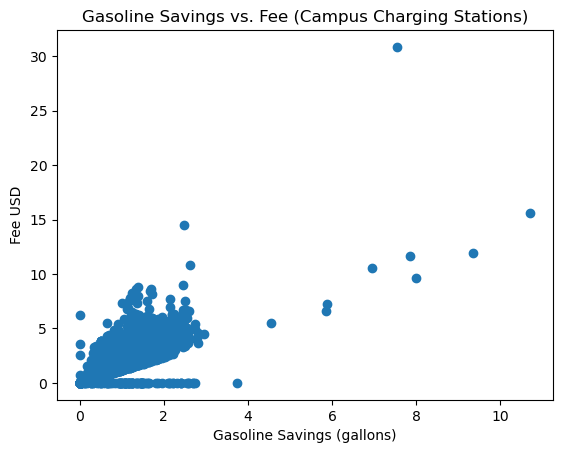

In [2]:
# using the gasoline savings columns as x axis and energy used in transaction as the y

# renaming columns
campus_ev_charging_df = campus_ev_charging_df.rename(columns={'Gasoline Savings (gallons)': 'gas_svngs',
                                                              'Energy (kWh)': 'energy'})


plt.scatter(campus_ev_charging_df['gas_svngs'], campus_ev_charging_df['Fee'])
plt.xlabel('Gasoline Savings (gallons)')
plt.ylabel('Fee USD')
plt.title('Gasoline Savings vs. Fee (Campus Charging Stations)')
plt.show()

What we can gather from this graph is that there a loose linear correlation between that gasoline savings provided by the charging session and the fee charged to the user. This means including the savings amount for for the user would be important to explore and include in any model wanting to figure out how to maximize profits through sales/fees.

## Histogram of Energy Used (kWh)

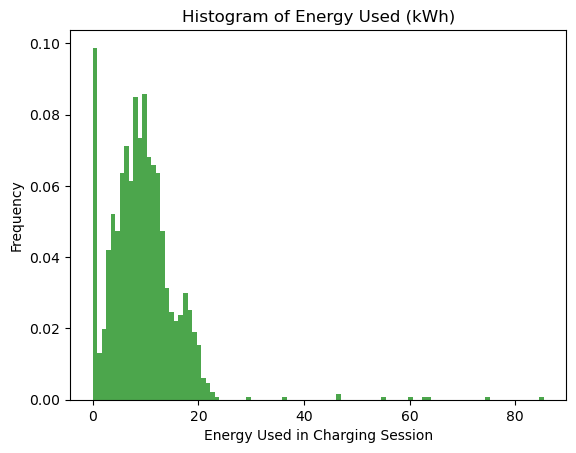

In [3]:
num_bins = 100
plt.hist(campus_ev_charging_df['energy'],num_bins, 
                            density = 1, 
                            color ='green',
                            alpha = 0.7)
plt.xlabel('Energy Used in Charging Session')
plt.ylabel('Frequency')
plt.title('Histogram of Energy Used (kWh)')
plt.show()

The histogram shows us that the distribution of the energy used is roughly bell-shaped meaning most of the transactions that took place are in the 0 - 20 kWh range. However, the data is right-skewed meaning the long tail is on the right side of the distribution. This occurs because there can be no transactions that are less than zero, but there are a few large numbers that skew the data to the right which will cause an overestimation in the mean. This means I may have to remove some of the extremely large outliers in order to get a more accurate model.

## Histogram of Charge Time

In [4]:
ev_charging_station_df['chargeTimeHrs'].sort_values()

1361     0.012500
2235     0.012778
2234     0.013333
379      0.014722
2236     0.015000
          ...    
2581     9.320278
2530     9.836944
2523    10.488333
2553    11.586944
173     55.238056
Name: chargeTimeHrs, Length: 3395, dtype: float64

Given there is only one outlier above 50 and the next highest is ~ 11 I will remove it to get an accurate look at charge time distrobution

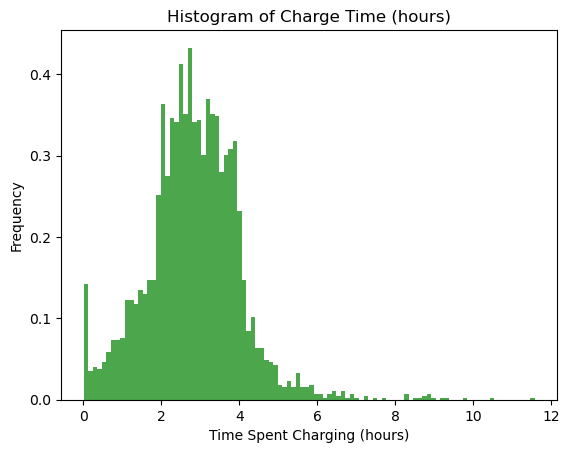

In [5]:
ev_charging_station_df = ev_charging_station_df.loc[ev_charging_station_df['chargeTimeHrs'] < 50]
plt.hist(ev_charging_station_df['chargeTimeHrs'],num_bins, 
                            density = 1, 
                            color ='green',
                            alpha = 0.7)
plt.xlabel('Time Spent Charging (hours)')
plt.ylabel('Frequency')
plt.title('Histogram of Charge Time (hours)')
plt.show()

The histogram shows us that the distribution of the charge times is also roughly bell-shaped meaning most of the transactions that took place are in the 0 - 6 hour range. This data is also right-skewed. This occurs because there can be no transaction that takes negative time, but there are a few large numbers that skew the data to the right which will cause an overestimation in the mean. However, overall I believe this distribution combined with other factors will help accurately train the model, since the skew is not as far right as the previous histogram.

## Distance vs. Amount Paid (USD)

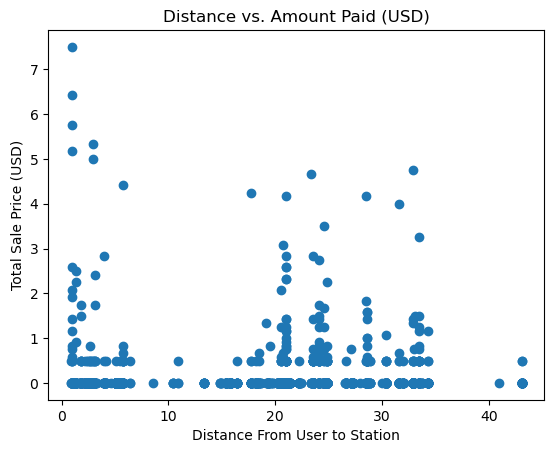

In [6]:
plt.scatter(ev_charging_station_df['distance'], ev_charging_station_df['dollars'])
plt.xlabel('Distance From User to Station')
plt.ylabel('Total Sale Price (USD)')
plt.title('Distance vs. Amount Paid (USD)')
plt.show()

My initial interpretation of the scatter is that there is little to no correlation between how far the charging station is from the user, and how much the user ends up spending. A few of the largest sales do take place at short distances, but there is still very little correlation. This will be helpful to know later on when considering whether to include distance as a variable in the model or not. If indeed distance plays no role, the company installing these stations will not have to consider placement too much.

## Conclusion

After my analysis of the graphs provided I feel I have found good datasets, and gained a good initial understanding of relationships/distributions that will help me get started on later steps. After seeing the distributions of some key variables, I feel that the distributions will allow for a pretty accurate model after some management of outliers. Additionally I feel I have gained a good early understanding of relationships. I have seen where there is some linear correlation, where a linear model would be helpful. I have also seen a couple attributes where there is no linear correlation, which may mean another model is better suited, or there is no relationship and certain variables can be excluded from models. 

# Term Project Milestone 2

### Overall approach
After analysis and feedback from term milestone 1, I am going to focus on creating a model that can predict which  electric vehicle charging station factors, as well as other factors like distance, day of the week etc. lead to the highest charge time (most time spent using station). I am mostly going to be using the dataset that has distance from user to station, as well as station type. However, the campus charging station dataset has useful variables like, gas savings and greenhouse gas savings. I am going to create a dataframe from that dataset that has the mean of each of those values based on energy usage (kWh rounded to the nearest single digit), and then merge that data with the main dataset.

### Drop any features that are not useful for your model building and explain why they are not useful.

As stated previously, I will only be using the kWh, gas savings, and greenhouse gas savings from the campus charging station dataset. So I will drop all columns from that dataset except those.

In [7]:
savings_df = campus_ev_charging_df[['energy', 'gas_svngs', 'GHG Savings (kg)']]
# Renaming GHG Savings (kg) column
savings_df = savings_df.rename(columns={'GHG Savings (kg)': 'ghg_svngs'})

For the main data set I will be dropping the 'created', 'ended', 'startTime', and 'endTime' columns since there is already a column for the total charge time in hours (chargeTimeHrs). I will also be dropping the 'weekday' column since there are already dummy variables for each day of the week. I will lastly drop the 'Id' columns as they are not going to be useful to the model.

In [8]:
charging_station_df = ev_charging_station_df.drop(['created', 'ended', 'startTime', 'endTime', 'weekday', 
                                                  'userId', 'stationId', 'locationId', 'sessionId'], axis=1)

### Perform any data extraction/selection steps.
### AND Transform features if necessary.

For this step I will be rounding the energy column to the nearest single digit, and the creating a mean of the gas savings and GHG savings columns by energy column. Once this is done, I will merge with main dataset on energy usage (kwhTotal rounded to the nearest digit).

In [9]:
# setting energy to nearest integer value
savings_df['energy'] = savings_df['energy'].round().astype(int)

In [10]:
# Before calculating median of gas and ghg savings, I will fill null values with the median
gas_svngs_mean = savings_df['gas_svngs'].mean()
ghg_svngs_mean = savings_df['ghg_svngs'].mean()
savings_df['gas_svngs'] = savings_df['gas_svngs'].fillna(gas_svngs_mean)
savings_df['ghg_svngs'] = savings_df['ghg_svngs'].fillna(ghg_svngs_mean)
# Creating groupby DF grouped by energy usage and calculating mean of the other columns
savings_df_group =  savings_df.groupby('energy', as_index=False)['gas_svngs', 'ghg_svngs'].mean()
savings_df_group.head()

/var/folders/nv/gxlbnd214c78s_bgh264hvsw0000gn/T/ipykernel_23063/3199938666.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  savings_df_group =  savings_df.groupby('energy', as_index=False)['gas_svngs', 'ghg_svngs'].mean()


,energy,gas_svngs,ghg_svngs
0,0,0.005122,0.017187
1,1,0.126933,0.425133
2,2,0.258625,0.865469
3,3,0.372213,1.245525
4,4,0.505675,1.692162


In [11]:
# Creating rounded energy column in main dataframe to merge with the savings dataframe
charging_station_df['energy'] = charging_station_df['kwhTotal'].round().astype(int)
charging_station_df.head()

,kwhTotal,dollars,chargeTimeHrs,platform,distance,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,energy
0,7.78,0.00,1.510556,android,NaN,0,3,0,1,0,0,0,0,0,0,8
1,9.74,0.00,2.177222,android,NaN,0,3,0,0,1,0,0,0,0,0,10
2,6.76,0.58,4.671667,android,NaN,0,3,0,0,0,0,1,0,0,0,7
3,6.17,0.00,1.768333,android,NaN,0,3,0,0,1,0,0,0,0,0,6
4,0.93,0.00,0.298611,android,NaN,0,3,0,0,0,1,0,0,0,0,1


In [12]:
# Merging the savings dataframe with the main dataframe based on energy column
merged_df = charging_station_df.merge(savings_df_group, how='left', on='energy')
merged_df.head()

,kwhTotal,dollars,chargeTimeHrs,platform,distance,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,energy,gas_svngs,ghg_svngs
0,7.78,0.00,1.510556,android,NaN,0,3,0,1,0,0,0,0,0,0,8,1.006379,3.367919
1,9.74,0.00,2.177222,android,NaN,0,3,0,0,1,0,0,0,0,0,10,1.248017,4.176725
2,6.76,0.58,4.671667,android,NaN,0,3,0,0,0,0,1,0,0,0,7,0.875266,2.929277
3,6.17,0.00,1.768333,android,NaN,0,3,0,0,1,0,0,0,0,0,6,0.754775,2.525928
4,0.93,0.00,0.298611,android,NaN,0,3,0,0,0,1,0,0,0,0,1,0.126933,0.425133


In [13]:
# Now we no longer need the rounded energy column
merged_df = merged_df.drop('energy', axis = 1)

### Engineer new useful features.

I believe it would it also be useful to know a rough estimate of the monetary value a user is saving on gas. I will create a column based of the gas savings column and the average price of a gallon of gas today($3.21) to get a gas savings column in dollars. Since it would also be helpful to know how long a user needs to charge in order to get the savings, I will create a column for savings per hour (in dollars).

In [14]:
merged_df['gas_svngs_monetary'] = (merged_df['gas_svngs'] * 3.21)

In [15]:
# savings per hour will be monetary value over the charge time in hours.
merged_df['svngs_per_hr'] = (merged_df['gas_svngs_monetary']/merged_df['chargeTimeHrs'])

In [16]:
merged_df.head()

,kwhTotal,dollars,chargeTimeHrs,platform,distance,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,gas_svngs,ghg_svngs,gas_svngs_monetary,svngs_per_hr
0,7.78,0.00,1.510556,android,NaN,0,3,0,1,0,0,0,0,0,0,1.006379,3.367919,3.230477,2.138602
1,9.74,0.00,2.177222,android,NaN,0,3,0,0,1,0,0,0,0,0,1.248017,4.176725,4.006134,1.840020
2,6.76,0.58,4.671667,android,NaN,0,3,0,0,0,0,1,0,0,0,0.875266,2.929277,2.809604,0.601414
3,6.17,0.00,1.768333,android,NaN,0,3,0,0,1,0,0,0,0,0,0.754775,2.525928,2.422827,1.370119
4,0.93,0.00,0.298611,android,NaN,0,3,0,0,0,1,0,0,0,0,0.126933,0.425133,0.407456,1.364504


### Deal with missing data (do not just drop rows or columns without justifying this).

Since distance from user to charging station is important, I will be filling the NA values with the median value. I will also be filling the platform column with the mode since it is categorical. 

In [17]:
merged_df['distance'] = merged_df['distance'].fillna(merged_df['distance'].median())
merged_df['platform'] = merged_df['platform'].fillna(merged_df['platform'].mode())

In [18]:
merged_df.head()

,kwhTotal,dollars,chargeTimeHrs,platform,distance,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,gas_svngs,ghg_svngs,gas_svngs_monetary,svngs_per_hr
0,7.78,0.00,1.510556,android,21.023826,0,3,0,1,0,0,0,0,0,0,1.006379,3.367919,3.230477,2.138602
1,9.74,0.00,2.177222,android,21.023826,0,3,0,0,1,0,0,0,0,0,1.248017,4.176725,4.006134,1.840020
2,6.76,0.58,4.671667,android,21.023826,0,3,0,0,0,0,1,0,0,0,0.875266,2.929277,2.809604,0.601414
3,6.17,0.00,1.768333,android,21.023826,0,3,0,0,1,0,0,0,0,0,0.754775,2.525928,2.422827,1.370119
4,0.93,0.00,0.298611,android,21.023826,0,3,0,0,0,1,0,0,0,0,0.126933,0.425133,0.407456,1.364504


In [19]:
# Now we can see there are no more rows with NA values
print('Before dropna', merged_df.shape)
merged_df = merged_df.dropna()
print('After dropna', merged_df.shape)

Before dropna (3394, 19)
After dropna (3394, 19)


### Create dummy variables if necessary.

Creating dummy variables for the platform column (ios, android, etc.), and facility type.

In [20]:
# First converting the facility type number to it's corresponding type (manufacturing = 1, office = 2,
# research and development = 3, other = 4)
merged_df['facilityType'] = merged_df['facilityType'].replace([1, 2, 3, 4], ['manufacturing', 
                                                                            'office', 'rAndD', 'other'])


In [21]:
merged_df = pd.get_dummies(merged_df, prefix=['facilityType', 'platform'],
                                  columns=['facilityType', 'platform'])

In [22]:
merged_df.head()

,kwhTotal,dollars,chargeTimeHrs,distance,managerVehicle,Mon,Tues,Wed,Thurs,Fri,...,ghg_svngs,gas_svngs_monetary,svngs_per_hr,facilityType_manufacturing,facilityType_office,facilityType_other,facilityType_rAndD,platform_android,platform_ios,platform_web
0,7.78,0.00,1.510556,21.023826,0,0,1,0,0,0,...,3.367919,3.230477,2.138602,0,0,0,1,1,0,0
1,9.74,0.00,2.177222,21.023826,0,0,0,1,0,0,...,4.176725,4.006134,1.840020,0,0,0,1,1,0,0
2,6.76,0.58,4.671667,21.023826,0,0,0,0,0,1,...,2.929277,2.809604,0.601414,0,0,0,1,1,0,0
3,6.17,0.00,1.768333,21.023826,0,0,0,1,0,0,...,2.525928,2.422827,1.370119,0,0,0,1,1,0,0
4,0.93,0.00,0.298611,21.023826,0,0,0,0,1,0,...,0.425133,0.407456,1.364504,0,0,0,1,1,0,0


### Identify Outliers

Here I will be using the boxplot to get a rough estimate of what the threshold for ouliers will be. I will be doing this for the two numerical variables I identified outliers in during the EDA step in milestone 1; distance and kwhTotal.

{'whiskers': [<matplotlib.lines.Line2D at 0x128233520>,
 'caps': [<matplotlib.lines.Line2D at 0x128233100>,
 'boxes': [<matplotlib.lines.Line2D at 0x128233610>],
 'medians': [<matplotlib.lines.Line2D at 0x1282087f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1282081c0>],
 'means': []}

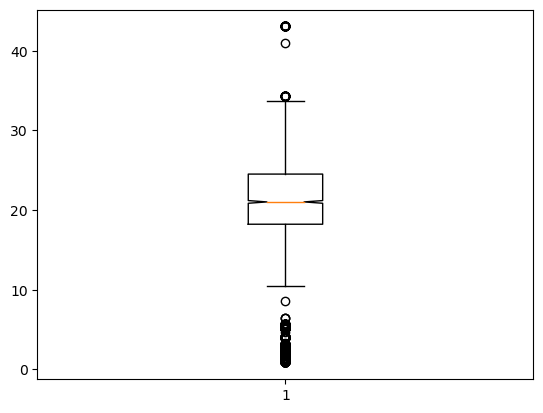

In [23]:
import matplotlib.pyplot as plt 
plt.boxplot(merged_df.distance, notch=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1282e0df0>,
 'caps': [<matplotlib.lines.Line2D at 0x1282bbb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1282e0b50>],
 'medians': [<matplotlib.lines.Line2D at 0x1282e1750>],
 'fliers': [<matplotlib.lines.Line2D at 0x1282e19f0>],
 'means': []}

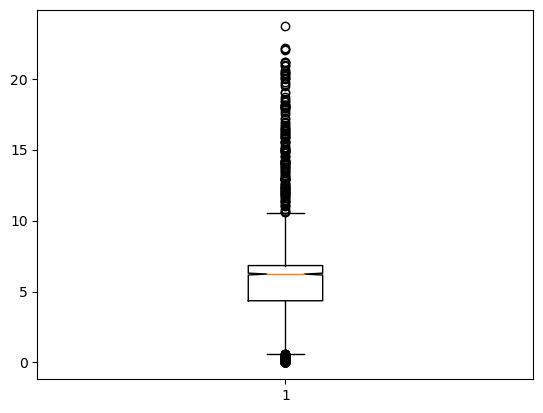

In [24]:
plt.boxplot(merged_df.kwhTotal, notch=True)

In [25]:
clean_df = merged_df.loc[merged_df['distance'] < 40]
clean_df = clean_df.loc[clean_df['distance'] > 3]

In [26]:
clean_df = clean_df.loc[clean_df['kwhTotal'] < 20]
clean_df = clean_df.loc[clean_df['kwhTotal'] > 1]

In [27]:
print('original dataset shape: ', merged_df.shape)
print('after removing outliers: ', clean_df.shape)

original dataset shape:  (3394, 24)
after removing outliers:  (2828, 24)


# Milestone 3

## Thought process on model selection

The goal of my model is to determine what factors of electric vehicle charging stations lead to to the highest amount of energy usage (most use from station). Given this approach, the kwhTotal is my target variable, and the others are the determining. 

Since the kWh is the target and it is numerical, not categorical I am going to use regression algorithms for my model. As identified earlier in my exploratory data analysis, there is a linear relationship between some variables, but not all. Therefore, I will consider a linear regression model, and a random forest regressor and comparing the results to see which yiedls a better result. I will see which one yields a better result by comparing the values for R2, root mean squared error (RMSE), and mean absolute error (MAE). For each model I will compare these values on the training and test set to make sure there is no major gap that would indicate overfitting.


### Splitting the data into train and test sets

In [28]:
from sklearn.model_selection import train_test_split

x_data = clean_df.drop(['kwhTotal'], axis=1) 
target_data = clean_df['kwhTotal']
# splitting the data using sklearn
# using 20% as test size
x_train, x_test, target_train, target_test = train_test_split(x_data,target_data,
                                                              test_size=0.2, random_state=42)

## Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

# Fitting the model on the train data
rf_model.fit(x_train, target_train)


RandomForestRegressor()

In [30]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math
# creating prediction from test and train set using the model
rf_predictions = rf_model.predict(x_test)
rf_predictions_train = rf_model.predict(x_train)

# calculating the r2, rmse, and mae using sklearn metrics
rf_r2_test = r2_score(target_test, rf_predictions)
rf_rmse_test = mean_squared_error(target_test, rf_predictions)
rf_mae_test = mean_absolute_error(target_test, rf_predictions)

print('R2 of random forest regressor: ', rf_r2_test)
# getting square root of mse for rmse
print('RMSE of random forest regressor: ', math.sqrt(rf_rmse_test))
print('MAE of random forest regressor: ', rf_mae_test)

# calculating the r2, rmse, and mae using sklearn metrics
rf_r2_train = r2_score(target_train, rf_predictions_train)
rf_rmse_train = mean_squared_error(target_train, rf_predictions_train)
rf_mae_train = mean_absolute_error(target_train, rf_predictions_train)

print('R2 of random forest regressor (train data): ', rf_r2_train)
# getting square root of mse for rmse
print('RMSE of random forest regressor (train data): ', math.sqrt(rf_rmse_train))
print('MAE of random forest regressor (train data): ', rf_mae_train)

R2 of random forest regressor:  0.9904717120289468
RMSE of random forest regressor:  0.24704908780331994
MAE of random forest regressor:  0.19359805653710288
R2 of random forest regressor (train data):  0.9985166305596628
RMSE of random forest regressor (train data):  0.0963829853624276
MAE of random forest regressor (train data):  0.07445358090185658


### Random Forest Regressor Analysis

The R2 for the test and train set are both .99. Given both values are in close range I can assume overfitting isn't a major issue. The RMSE and MAE values are also very small (~.25 & ~.2 for the test set) meaning, when the model did make an incorrect prediction, the magnitude of the error was small. Similarly we do see smaller RMSE and MAE values for the train set which is expected since the model should perform better on the data it was trained with.

## Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, target_train)

# creating prediction from test set using the model
predictions_lr = lr.predict(x_test)
predictions_lr_train = lr.predict(x_train)

In [32]:
# calculating the r2, rmse, and mae using sklearn metrics
r2_test = r2_score(target_test, predictions_lr)
rmse_test = mean_squared_error(target_test, predictions_lr)
mae_test = mean_absolute_error(target_test, predictions_lr)
# same for train data
r2_train = r2_score(target_train, predictions_lr_train)
rmse_train = mean_squared_error(target_train, predictions_lr_train)
mae_train = mean_absolute_error(target_train, predictions_lr_train)
print('R2 of Linear Regression: ', r2_test)
print('RMSE of Linear Regression: ', rmse_test)
print('MAE of tLinear Regressionest', mae_test)
print('R2 of Linear Regression (train data): ', r2_train)
print('RMSE of Linear Regression (train data): ', rmse_train)
print('MAE of Linear Regression (train data):', mae_train)

R2 of Linear Regression:  0.989532212144854
RMSE of Linear Regression:  0.06705119888591485
MAE of tLinear Regressionest 0.21397741686090924
R2 of Linear Regression (train data):  0.9885743561221476
RMSE of Linear Regression (train data):  0.07155370133534888
MAE of Linear Regression (train data): 0.2224496203998265


### Linear Regression Analysis

The R2 value for the test and train set are both .98. Given both values are in close range I can assume overfitting isn't a major issue for this model either. The RMSE and MAE values are also very small (~.07 & ~.2 for the test set). This is interesting because while the R2 value is slightly smaller, the RMSE and MAE values are smaller as well. This could mean that there is some overfitting in the Random Forest Regressor, because the Linear Regression model, when incorrect, had a smaller magnitude of error. This could mean that the Linear Regression Model may perform better at scale. Given this analysis I think it would be best to use a pipeline with a grid search to find the best model/parameters.

## Using Pipeline and Grid Search to Help Find Best Parameters and Model

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Creating a Pipeline with a standard scaler and LinearRegression model

lr_pipe = LinearRegression()
scaler = StandardScaler()


pipeline = Pipeline([("scaler", scaler), ("regressor", lr_pipe)])

# create search space with different parameters for each regression model (linear and random forest)
search_space = {'regressor': [RandomForestRegressor()],'regressor__n_estimators': [10,100,1000],
               'regressor__max_features': [1,2,3]}


grid_search = GridSearchCV(pipeline, search_space, cv=5, verbose=0)

In [34]:
# best model hyperparameters
best_model = grid_search.fit(x_train, target_train)
print(best_model.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 RandomForestRegressor(max_features=3, n_estimators=1000))])


In [35]:
# Creating new model with parameters suggested by grid search

new_rf = RandomForestRegressor(n_estimators=1000, max_features=3)

# Fitting the model on the train data
new_rf.fit(x_train, target_train)

RandomForestRegressor(max_features=3, n_estimators=1000)

In [36]:
# creating prediction from test and train set using the best model (from grid search)
rf_predictions = new_rf.predict(x_test)
rf_predictions_train = new_rf.predict(x_train)

# calculating the r2, rmse, and mae using sklearn metrics
rf_r2_test = r2_score(target_test, rf_predictions)
rf_rmse_test = mean_squared_error(target_test, rf_predictions)
rf_mae_test = mean_absolute_error(target_test, rf_predictions)

print('R2 of random forest regressor (best params): ', rf_r2_test)
# getting square root of mse for rmse
print('RMSE of random forest regressor (best params): ', math.sqrt(rf_rmse_test))
print('MAE of random forest regressor (best params): ', rf_mae_test)

# calculating the r2, rmse, and mae using sklearn metrics
rf_r2_train = r2_score(target_train, rf_predictions_train)
rf_rmse_train = mean_squared_error(target_train, rf_predictions_train)
rf_mae_train = mean_absolute_error(target_train, rf_predictions_train)

print('R2 of random forest regressor (train data & best params): ', rf_r2_train)
# getting square root of mse for rmse
print('RMSE of random forest regressor (train data & best params): ', math.sqrt(rf_rmse_train))
print('MAE of random forest regressor (train data & best params): ', rf_mae_train)

R2 of random forest regressor (best params):  0.9860972769618509
RMSE of random forest regressor (best params):  0.2984185068815411
MAE of random forest regressor (best params):  0.21258294779325074
R2 of random forest regressor (train data & best params):  0.9980946796881527
RMSE of random forest regressor (train data & best params):  0.10923447075079604
MAE of random forest regressor (train data & best params):  0.08127942546939561


### Analysis After Pipeline and Grid Search

Overall I am satisfied with the results, with the R2 value being .98 for the test set. Given my suspicions that the original Random Forest Regressor was possibly over-fit (.99 R2 value), I feel more confident in the new model at scale. Additionally with the new model the RMSE and MAE values are still relatively small (.29 and .2), meaning there was not much of an increase in error magnitude.

## Evaluating Feature Importance

<BarContainer object of 23 artists>

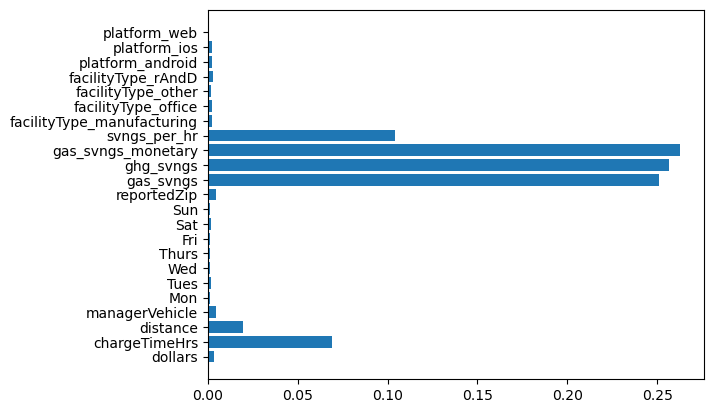

In [37]:
plt.barh(x_train.columns, new_rf.feature_importances_)

### Elvaluating Charge Time

Given charge time has a high level of importance, I want to see if there is a positive or negative correlation.

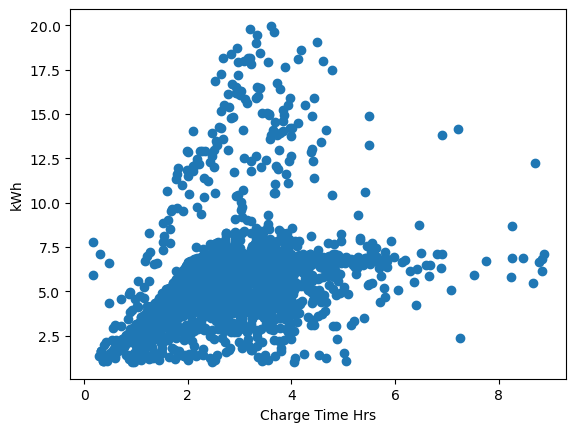

In [38]:
plt.scatter(clean_df['chargeTimeHrs'], clean_df['kwhTotal'])
plt.xlabel('Charge Time Hrs')
plt.ylabel('kWh')
plt.show()

While there is a positive correlation with charge time and kWh, which would seem obvious given the more time spent charging the more energy used, we do actually see most of the highest energy usage take place below the middle value (4 hours). This would indicate most customers mat prefer to use stations that charge at a faster rate.